# The Gibbs phenomenon

The Fourier series of a periodic function with fine jumps presents oscillations close to the discontinuities.
For example, the square wave defined by the odd-extension of $ f(x)=1 $ for $ 0<x<1 $ (namely let $ f(x)=-1 $ for $ -1<x<0 $, and repeat periodically the pattern) is
$$
f(x)=\frac4\pi \sum_{n\in\mathbb{Z_+}} \frac1{2n+1} \sin((2n+1)\pi x)
$$

In this notebook we will explore the Gibbs phenomenon plotting truncated sums of the above series.

In [1]:
# preliminary inclusions
import numpy as np

from matplotlib import pyplot as plt
from math import floor
from scipy import linspace

In [2]:
class PartialSum:
    def __init__(self, f, n, l=1):
        self.n = n
        self.l = l
        # an index is already shifted: a_1 == an[0], a_k == an[k-1]
        self.an = [f(n) for n in range(1,self.n+1)]

    def __call__(self, x):
        return sum(self.an[n] * np.sin((n+1)*np.pi/self.l*x) for n in range(0,self.n))

In [3]:
def plot_fn(an, ran, steps, l=1, xlim=None, ylim=None, pts=200, orig=None):
    x0, xl = ran
    x = linspace(x0, xl, pts)
    f = PartialSum(an, steps, l)
    
    if xlim or ylim:
        plt.figure(figsize=(14,4))
        ax1 = plt.subplot(121)
        ax1.plot(x, f(x))
        ax1.set_title("Truncated to $a_{{{}}}$".format(steps))
        if orig:
            ax1.plot(x, orig(x), 'r', linewidth=1)
        ax2 = plt.subplot(122)
        if xlim:
            ax2.set_xlim(xlim)
        if ylim:
            ax2.set_ylim(ylim)
        if orig:
            ax2.plot(x, orig(x), 'r', linewidth=1)
        ax2.plot(x, f(x))
    else:
        plt.plot(x, f(x))
        if orig:
            plt.plot(x, orig(x), 'r', linewidth=1)
    
    plt.show()

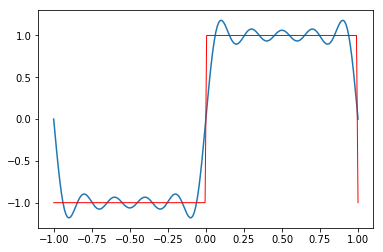

In [4]:
def an_const_one(n):
    "Coefficient a_n = 4/(n*pi) if n is odd and 0 oterwise for the odd extension of f=1 in (0,1)"
    return 0.0 if n % 2 == 0 else 4. / (np.pi * n)

orig = lambda x: np.array([1 if floor(x)%2==0 == 0 else -1 for x in x])

plot_fn(an_const_one, (-1,1), 10, orig=orig)

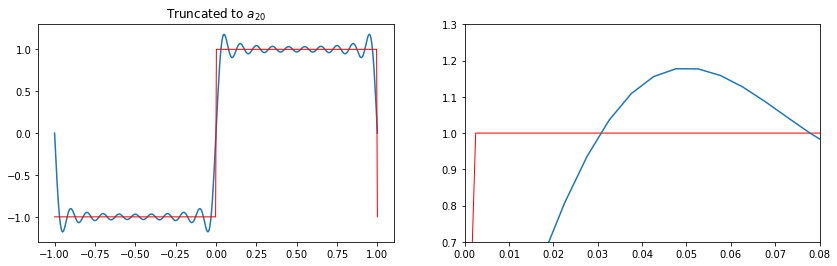

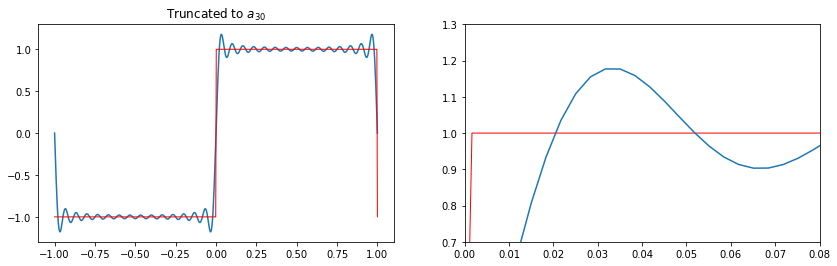

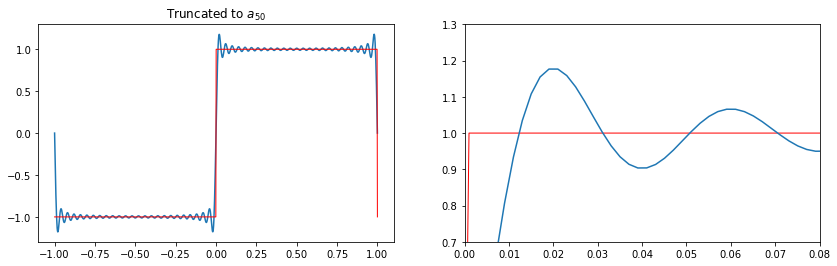

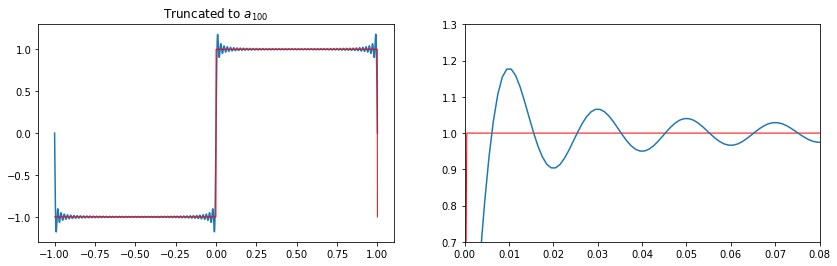

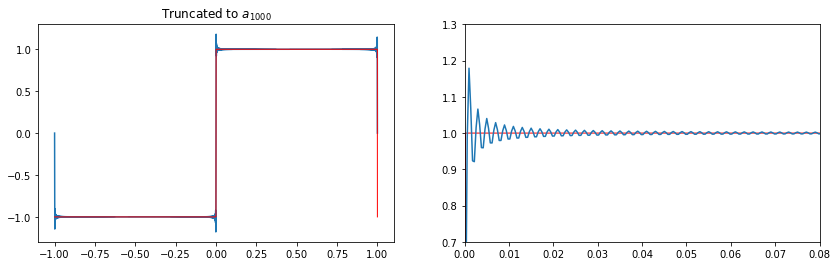

In [5]:
for steps in (20, 30, 50, 100, 1000):
    plot_fn(an_const_one, (-1,1), steps, xlim=(0,0.08), ylim=(0.7, 1.3), pts=min(steps*20, 5000), orig=orig)

The following is the series for the odd extension of $f(x) = 1-x$ on $(0,1)$:
$$
f(x)=\frac2\pi \sum_{n\in\mathbb{Z_+}} \frac1{n} \sin(n\pi x)
$$

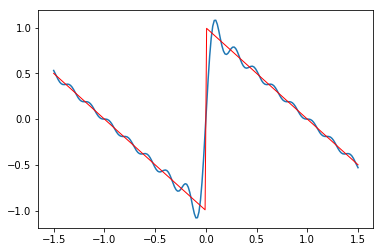

In [6]:
def an_one_minus_x(n):
    "Coefficient a_n = 2/(n*pi)"
    return 2.0/(n*np.pi)

orig = lambda x: np.array([1-x+floor(x) if floor(x)%2==0 == 0 else -x-1-floor(-x) for x in x])

plot_fn(an_one_minus_x, (-1.5,1.5), 10, orig=orig)

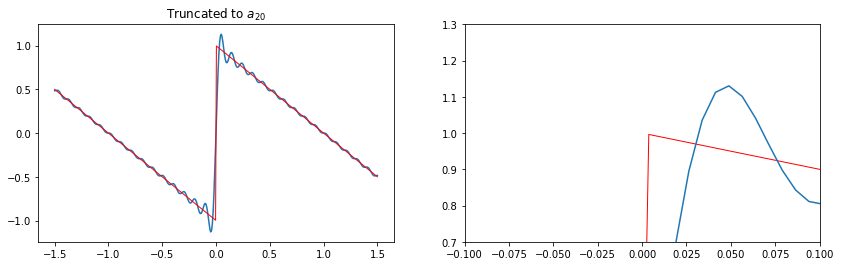

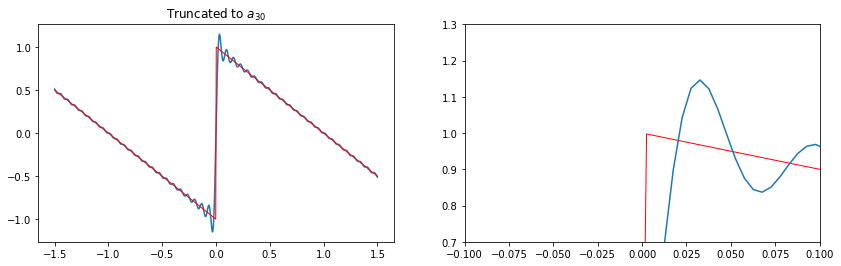

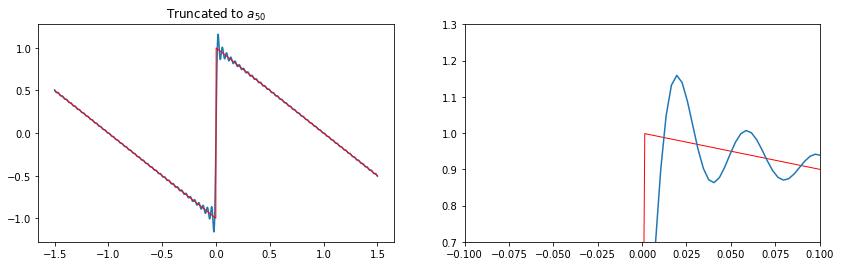

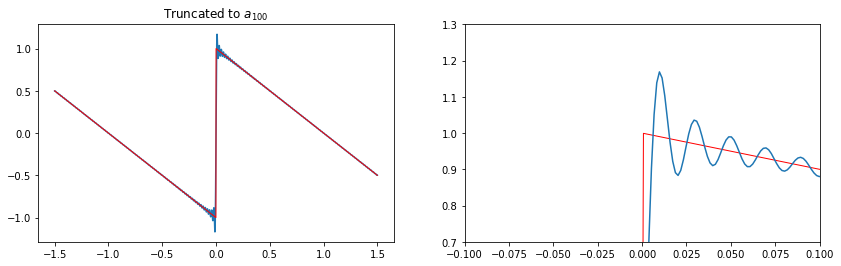

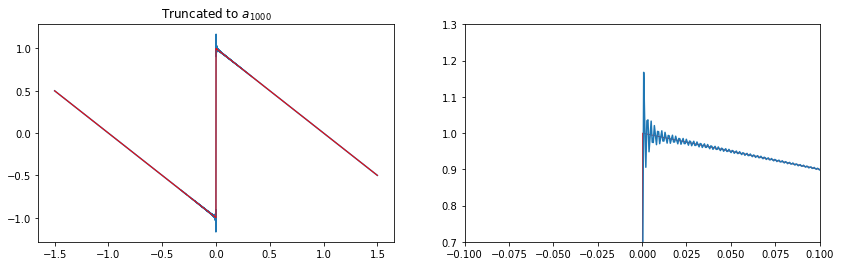

In [7]:
for steps in (20, 30, 50, 100, 1000):
    plot_fn(an_one_minus_x, (-1.5,1.5), steps, xlim=(-0.1,0.1), ylim=(0.7, 1.3), pts=min(steps*20, 5000), orig=orig)

Once `sagemath` will be easily installable, all this will become immensely easier. Indeed one can replicate the first of our plot in `sage` [practically trivially](http://doc.sagemath.org/html/en/reference/functions/sage/functions/piecewise.html#sage.functions.piecewise.PiecewiseFunction.EvaluationMethods.fourier_series_partial_sum):

```python
f2(x) = 1; f1(x) = -1
f = piecewise([[(-1,0),f1],[(0,1),f2]])
S = f.fourier_series_partial_sum(10)
g = plot(S, x, -1, 1, color='blue')

# We did not do this in our plots, but it is
# nice to see how easy it is to do it in sage:
saw(x) = x - 2 * floor((x + 1) / 2)
g += plot(saw(x) / abs(saw(x)), x, -1, 1, color='red')

g
```

Finally, the series for the odd extension of $f(x) = x(\pi - x)$ on $(0,\pi)$:
$$
f(x)=\frac8\pi \sum_{n\in\mathbb{Z_+}} \frac1{(2n+1)^3} \sin((2n+1) x)
$$
where we expect the convergence to be nice and fast.

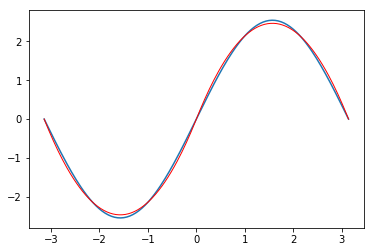

In [8]:
def an_pix_minus_xsq(n):
    "Coefficient a_n = 8/(n^3*pi) if n is odd and 0 oterwise for the odd extension of f=1 in (0,1)"
    return 0.0 if n % 2 == 0 else 8.0/(n**3*np.pi)

def orig(x):
    def f(x):
        x = x/np.pi
        one_xscaled = 1-x+floor(x) if floor(x)%2==0 else -x-1-floor(-x)
        pi_x = np.pi*one_xscaled
        x = x-floor(x) if floor(x)%2==0 else -x-floor(-x)
        x = np.pi*x
        return x*pi_x
    return np.array([f(x) for x in x])


plot_fn(an_pix_minus_xsq, (-np.pi,np.pi), 1, l=np.pi, orig=orig)

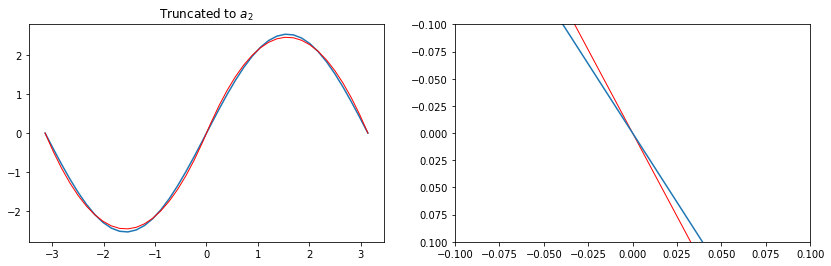

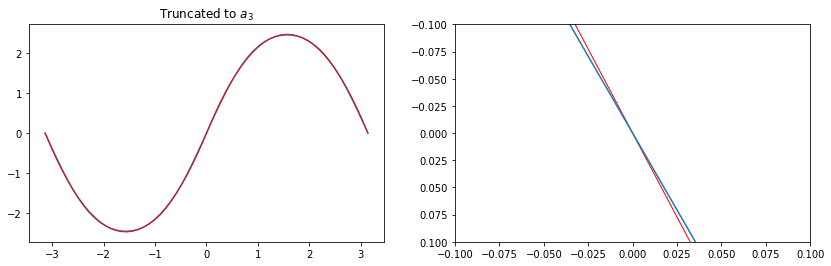

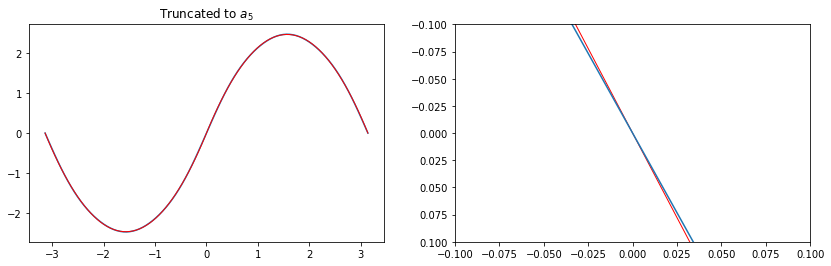

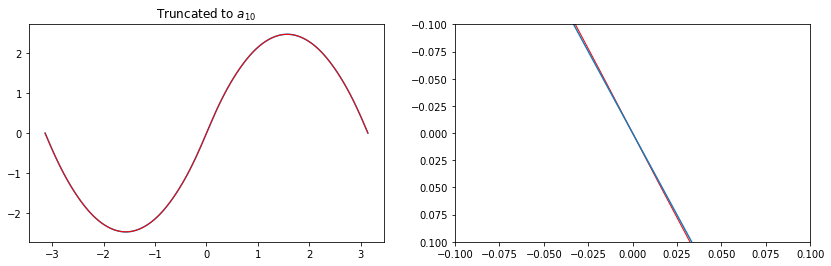

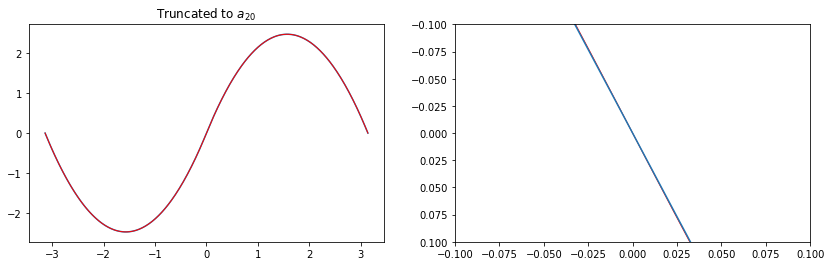

In [9]:
for steps in (2, 3, 5, 10, 20):
    plot_fn(an_pix_minus_xsq, (-np.pi,np.pi), steps, xlim=(-0.1,0.1), ylim=(0.1, -0.1), pts=min(steps*20, 5000), l=np.pi, orig=orig)